## RSS plots from the date 250423 with atmospheric correction


### Importing the libarys and files, and setting them up

In [14]:
from hypso import Hypso1, Hypso2
import os 
import matplotlib.pyplot as plt
from global_land_mask import globe 
import numpy as np 

import funcions_autonom as f
import atmosperic_correction as ac
import xarray as xr
import re
import math
import importlib

dir_path = "."

In [15]:
importlib.reload(f)
importlib.reload(ac)

<module 'atmosperic_correction' from '/home/itk/Documents/AnneMarthe/Master/Hypos_analyse/atmosperic_correction.py'>

In [16]:
dir_path = "."
i_250423 = os.path.join(dir_path, "image64N9E_2025-04-23T10-28-01Z-l1a.nc")
i_250423_b = os.path.join(dir_path, "image64N9E_2025-04-23T10-28-01Z-l1b.nc")
i_250423_c = os.path.join(dir_path, "image64N9E_2025-04-23T10-28-01Z-l1c.nc")
i_250423_d = os.path.join(dir_path, "image64N9E_2025-04-23T10-28-01Z-l1d.nc")

satobj_h1_250423 = Hypso1( path = i_250423, verbose = True )

l1a_cube_250423 = satobj_h1_250423.l1a_cube
l1b_cube_250423 = Hypso1( path = i_250423_b, verbose = True )
l1c_cube_250423 = Hypso1( path = i_250423_c, verbose = True )
l1d_cube_250423 = Hypso1( path = i_250423_d, verbose = True )

l1c_cube_250423 = l1c_cube_250423.l1c_cube
l1b_cube_250423 = l1b_cube_250423.l1b_cube
l1d_cube_250423 = l1d_cube_250423.l1d_cube

satobj_h1_250423.run_direct_georeferencing() # in order to get the longiyudes and latitudes 

[INFO] Loading L1a capture image64N9E_2025-04-23T10-28-01Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1b capture image64N9E_2025-04-23T10-28-01Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1c capture image64N9E_2025-04-23T10-28-01Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1d capture image64N9E_2025-04-23T10-28-01Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Running direct georeferencing...
[INFO] ADCS samples: 539
[INFO] ADCS time range: 1745403420.000000 to 1745404350.000000
[INFO] Frame time range: 1745404081.613977 to 1745404156.238977
[INFO] 298 sample(s) inside frame time range
[INFO] Interpolating 598 frames
[INFO] Computing pixel latitude and longitude coordinates ...
[INFO] Interpolating pixel coordinate gaps...
[INFO] Direct georeferencing done
[INFO] Running track geometry

In [17]:
i_250423_2 = os.path.join(dir_path, "image64N9E_2025-04-23T12-03-20Z-l1a.nc")
i_250423_2_b = os.path.join(dir_path, "image64N9E_2025-04-23T12-03-20Z-l1b.nc")
i_250423_2_c = os.path.join(dir_path, "image64N9E_2025-04-23T12-03-20Z-l1c.nc")
i_250423_2_d = os.path.join(dir_path, "image64N9E_2025-04-23T12-03-20Z-l1d.nc")

satobj_h1_250423_2 = Hypso1( path = i_250423_2, verbose = True )

l1a_cube_250423_2 = satobj_h1_250423_2.l1a_cube
l1b_cube_250423_2 = Hypso1( path = i_250423_2_b, verbose = True )
l1c_cube_250423_2 = Hypso1( path = i_250423_2_c, verbose = True )
l1d_cube_250423_2 = Hypso1( path = i_250423_2_d, verbose = True )

l1c_cube_250423_2 = l1c_cube_250423_2.l1c_cube
l1b_cube_250423_2 = l1b_cube_250423_2.l1b_cube
l1d_cube_250423_2 = l1d_cube_250423_2.l1d_cube

satobj_h1_250423_2.run_direct_georeferencing() # in order to get the longiyudes and latitudes 

[INFO] Loading L1a capture image64N9E_2025-04-23T12-03-20Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1b capture image64N9E_2025-04-23T12-03-20Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1c capture image64N9E_2025-04-23T12-03-20Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1d capture image64N9E_2025-04-23T12-03-20Z


KeyboardInterrupt: 

In [ ]:
path_cla_atm_250423 = os.path.join(dir_path, "image64N9E_2025-04-23T10-28-01Z-l1c.nc.polymer.nc")

cla_atm_250423 = xr.open_dataset(path_cla_atm_250423)
latitude = cla_atm_250423['latitude']
longitude = cla_atm_250423['longitude']

#print(cla_atm_250423['fb'])
#print(cla_atm_250423['SPM'])

In [ ]:
path_cla_atm_250423_2 = os.path.join(dir_path, "image64N9E_2025-04-23T12-03-20Z-l1c.nc.polymer.nc")

cla_atm_250423_2 = xr.open_dataset(path_cla_atm_250423_2)
latitude = cla_atm_250423_2['latitude']
longitude = cla_atm_250423_2['longitude']

#cla_atm_250423_2.data_vars

### Getting out the correct variables

In [ ]:
importlib.reload(f)
importlib.reload(ac)

<module 'atmosperic_correction' from '/home/itk/Documents/AnneMarthe/Master/Hypos_analyse/atmosperic_correction.py'>

In [ ]:
rho_vars = [var for var in cla_atm_250423_2.variables if re.match(r'rho_w_\d+', var)]
rho_vars_sorted = sorted(rho_vars, key=lambda v: int(v.split('_')[-1])) #A variable containing the name of all the rho vaibles
print("Sorted rho variables:", rho_vars_sorted)
rho_vars_sorted = rho_vars_sorted[5:]
print(len(rho_vars_sorted))

print(cla_atm_250423_2.data_vars)

Sorted rho variables: ['rho_w_401', 'rho_w_404', 'rho_w_408', 'rho_w_411', 'rho_w_415', 'rho_w_418', 'rho_w_422', 'rho_w_425', 'rho_w_429', 'rho_w_432', 'rho_w_436', 'rho_w_439', 'rho_w_443', 'rho_w_446', 'rho_w_450', 'rho_w_453', 'rho_w_457', 'rho_w_460', 'rho_w_464', 'rho_w_467', 'rho_w_471', 'rho_w_474', 'rho_w_478', 'rho_w_481', 'rho_w_485', 'rho_w_488', 'rho_w_492', 'rho_w_495', 'rho_w_499', 'rho_w_502', 'rho_w_506', 'rho_w_509', 'rho_w_513', 'rho_w_516', 'rho_w_520', 'rho_w_523', 'rho_w_526', 'rho_w_530', 'rho_w_533', 'rho_w_537', 'rho_w_540', 'rho_w_544', 'rho_w_547', 'rho_w_551', 'rho_w_554', 'rho_w_558', 'rho_w_561', 'rho_w_565', 'rho_w_568', 'rho_w_572', 'rho_w_575', 'rho_w_579', 'rho_w_582', 'rho_w_585', 'rho_w_589', 'rho_w_592', 'rho_w_596', 'rho_w_599', 'rho_w_603', 'rho_w_606', 'rho_w_610', 'rho_w_613', 'rho_w_617', 'rho_w_620', 'rho_w_623', 'rho_w_627', 'rho_w_630', 'rho_w_634', 'rho_w_637', 'rho_w_641', 'rho_w_644', 'rho_w_648', 'rho_w_651', 'rho_w_654', 'rho_w_658', 'r

In [ ]:
x_1 = [387.84749685, 391.40406599, 394.95941579, 398.51354623, 402.06645732, 405.61814905, 409.16862143, 412.71787446, 416.26590814, 419.81272246, 423.35831743, 426.90269305, 430.44584931, 433.98778622, 437.52850378, 441.06800198, 444.60628083, 448.14334033, 451.67918047, 455.21380126, 458.7472027, 462.27938479, 465.81034752, 469.3400909 , 472.86861492,476.3959196 , 479.92200491, 483.44687088, 486.97051749, 490.49294475,494.01415266, 497.53414122, 501.05291042, 504.57046026, 508.08679076,511.6019019 , 515.11579369, 518.62846612, 522.13991921, 525.65015294,529.15916731, 532.66696233, 536.173538  , 539.67889432, 543.18303128,546.68594889, 550.18764715, 553.68812606, 557.18738561, 560.68542581,564.18224665, 567.67784814, 571.17223028, 574.66539307, 578.1573365, 581.64806058, 585.1375653 , 588.62585068, 592.1129167 , 595.59876336,599.08339068, 602.56679864, 606.04898725, 609.5299565 , 613.0097064 ,616.48823695, 619.96554815, 623.44163999, 626.91651248, 630.39016561,633.86259939, 637.33381382, 640.8038089 , 644.27258462, 647.74014099,651.20647801, 654.67159568, 658.13549399, 661.59817294, 665.05963255,668.5198728 , 671.9788937 , 675.43669524, 678.89327744, 682.34864028,685.80278376, 689.25570789, 692.70741267, 696.1578981 , 699.60716418,703.0552109 , 706.50203826, 709.94764628, 713.39203494, 716.83520425,720.2771542 , 723.7178848 , 727.15739605, 730.59568795, 734.03276049,737.46861368, 740.90324752, 744.336662  , 747.76885713, 751.19983291,754.62958933, 758.0581264 , 761.48544412, 764.91154248, 768.33642149,771.76008115, 775.18252146, 778.60374241, 782.02374401, 785.44252625,788.86008915, 792.27643269, 795.69155687, 799.10546171, 802.51814719]
x=x_1[9:118]

# Target latitude and longitude

#target_lat = [63.818490304354434,63.793837321385155, 63.65192496143867, 63.660555970548074] #område 2.1.
#target_lon = [9.531415429238418, 9.442656298818237,9.526455044589706,9.439764451470932]

#target_lat = [63.646767083517425,63.61771951990031, 63.47865598622861, 63.42721372576498] #område 5.1
#target_lon = [9.804697410334523, 9.723689711502818,10.061035990832918,9.982929114384596]  

target_lat = [64.17324887890479,64.11631446557637, 63.896904083590066, 63.887923483169004] #område 6.1
target_lon = [9.582148298814932,8.924448409066027, 9.578289180688513, 8.96230357578283]

#target_lat = [64.48557437461893,64.52896641587218, 64.20992561747796, 64.22009411667561] #område 7
#target_lon = [9.886201113342556, 8.708294855080245,9.704720121565003,8.73032214102829]  

#target_lat = [63.52676744792975, 63.55113867486421, 63.44802428401152, 63.46332195091103] #område 8 
#target_lon = [10.726421572030368, 10.227932960954064, 10.706024496195505, 10.211631333282082] 

In [ ]:
latitude_250423_2 = np.array(cla_atm_250423_2['latitude'])
longitude_250423_2 = np.array(cla_atm_250423_2['longitude'])

rss_atmc_250423_2 = ac.rss_atm_corrected(rho_vars_sorted, cla_atm_250423_2) #RSS for alle piksler, denne inneolder all info
start_end_row_piksel_2, start_end_row_col_2 = f.latLong_to_piksel(target_lat, target_lon, latitude_250423_2, longitude_250423_2) #Får ut pisklene tilørende punktene
area_in_piksel_rows_2, area_in_piksel_cols_2 = ac.piksles_in_slected_area(start_end_row_piksel_2, start_end_row_col_2, latitude_250423_2, longitude_250423_2)
rss_for_Area_2 = ac.rss_given_pixels(area_in_piksel_rows_2, area_in_piksel_cols_2, rss_atmc_250423_2)

median_2 = np.median(rss_for_Area_2, axis=0)

normaized_spectrum_median_250423_2 = f.min_max_nomralization(median_2)

l2_norm_median_250423_2 = np.linalg.norm(median_2)  #l2 norm
l2_normalized_median_spectrum_250423_2 = median_2 / l2_norm_median_250423_2  #l2 normalisering

#print("Row:", area_in_piksel_cols)
#print("Column:", area_in_piksel_rows)
#print(latitude_250423_2[1][2])
#print("RSS for area:", rss_for_Area_2.shape)
print("Median RSS for area:", median_2.shape)
print(median_2)

Median RSS for area: (109,)
[ 0.00029367 -0.00228712 -0.00017037  0.00308623  0.00010302 -0.0017795
  0.00388427  0.0022121   0.00625531  0.00356581  0.007559    0.00412466
  0.00592054  0.00652883  0.00603093  0.00719189  0.0060047   0.00627501
  0.00762543  0.00840736  0.00730717  0.01042673  0.00853209  0.00890723
  0.00858334  0.00716582  0.00798439  0.00936965  0.01013787  0.0069772
  0.0088993   0.01199435  0.00828099  0.00857222  0.00918321  0.00935593
  0.00773052  0.00879121  0.00812351  0.00760102  0.00776016  0.00774414
  0.00730204  0.00743028  0.0063474   0.0066175   0.00630844  0.00590202
  0.00677993  0.00767516  0.0053621   0.00543109  0.00537688  0.00495875
  0.00498299  0.00494803  0.00470701  0.0046461   0.00383459  0.00394321
  0.00309206  0.00291336  0.00312583  0.00285886  0.00311818  0.00271767
  0.00238133  0.00209221  0.00202125  0.00126678  0.0017184   0.00159505
  0.00143428  0.00146381  0.00115879  0.00102226  0.00077992  0.00016802
 -0.00174772 -0.00083852 

In [ ]:
latitude_250423 = np.array(cla_atm_250423['latitude'])
longitude_250423 = np.array(cla_atm_250423['longitude'])

rss_atmc_250423 = ac.rss_atm_corrected(rho_vars_sorted, cla_atm_250423) #RSS for alle piksler, denne inneolder all info
start_end_row_piksel, start_end_row_col = f.latLong_to_piksel(target_lat, target_lon, latitude_250423, longitude_250423) #Får ut pisklene tilørende punktene
area_in_piksel_rows, area_in_piksel_cols = ac.piksles_in_slected_area(start_end_row_piksel, start_end_row_col, latitude_250423, longitude_250423)
rss_for_Area = ac.rss_given_pixels(area_in_piksel_rows, area_in_piksel_cols, rss_atmc_250423)

median = np.median(rss_for_Area, axis=0)

normaized_spectrum_median_250423 = f.min_max_nomralization(median)

l2_norm_median_250423 = np.linalg.norm(median)  #l2 norm
l2_normalized_median_spectrum_250423 = median / l2_norm_median_250423  #l2 normalisering

#print("Row:", area_in_piksel_cols)
#print("Column:", area_in_piksel_rows)
#print(latitude_250423[1][2])
#print("RSS for area:", rss_for_Area.shape)
print("Median RSS for area:", median.shape)
print(median)

#print(rss_atmc_250423.shape)
#print(start_end_row_piksel, start_end_row_col)

Median RSS for area: (109,)
[ 0.00109253 -0.00178787  0.00016167  0.00353087  0.00061197 -0.00149599
  0.00431914  0.00263859  0.00680945  0.00393837  0.00795211  0.00443607
  0.00630283  0.00677038  0.00626475  0.00759083  0.00638073  0.00672353
  0.00809245  0.00851899  0.00782662  0.01094131  0.00898174  0.00913914
  0.0089696   0.00760276  0.00838317  0.00971463  0.01042111  0.0073538
  0.00937066  0.01244732  0.00872757  0.00895368  0.00958274  0.00965621
  0.00805863  0.00913222  0.00842762  0.00785361  0.00794705  0.00801234
  0.0075818   0.00770056  0.0066575   0.00705586  0.00667284  0.0062491
  0.00701694  0.00789826  0.00560132  0.00557799  0.00542886  0.00506419
  0.00507005  0.00494638  0.00469997  0.00465338  0.00388711  0.00392932
  0.00316187  0.00299183  0.00318881  0.00289086  0.00307666  0.00265597
  0.00235802  0.00211582  0.00194642  0.00131317  0.00166502  0.00154483
  0.00139276  0.00143501  0.00118166  0.00100179  0.00075573  0.00016687
 -0.00141342 -0.00062782 

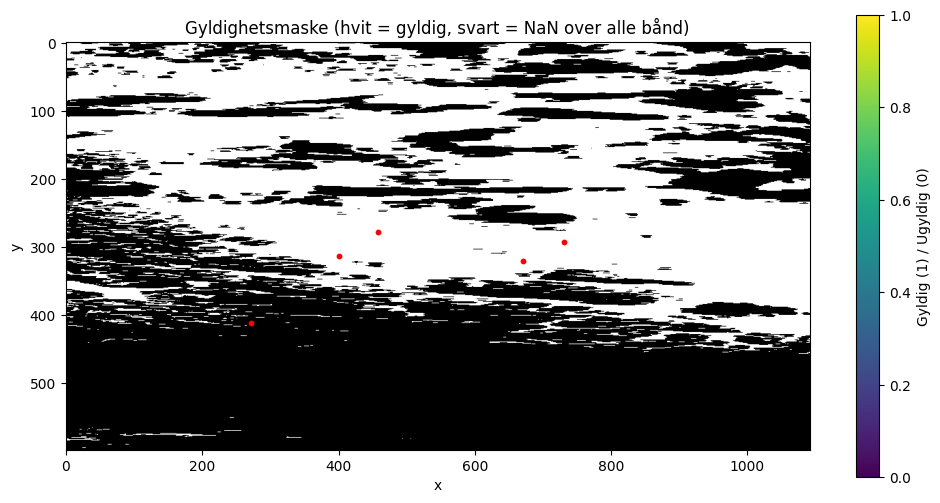

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Anta at data.shape = (114, 598, 1092)
# Vi lager en maske som er True der det finnes minst én gyldig verdi i z-retning
valid_mask = ~np.isnan(rss_atmc_250423).all(axis=0)  # shape: (598, 1092)

# Plot masken
plt.figure(figsize=(12, 6))
plt.imshow(valid_mask, cmap='gray')
plt.title("Gyldighetsmaske (hvit = gyldig, svart = NaN over alle bånd)")
plt.xlabel("x")
plt.scatter(272, 411, color='red', s=10)
for i in range(4):
    plt.scatter(start_end_row_col[i], start_end_row_piksel[i] , color='red', s=10)
plt.ylabel("y")
plt.colorbar(label='Gyldig (1) / Ugyldig (0)')
plt.show()

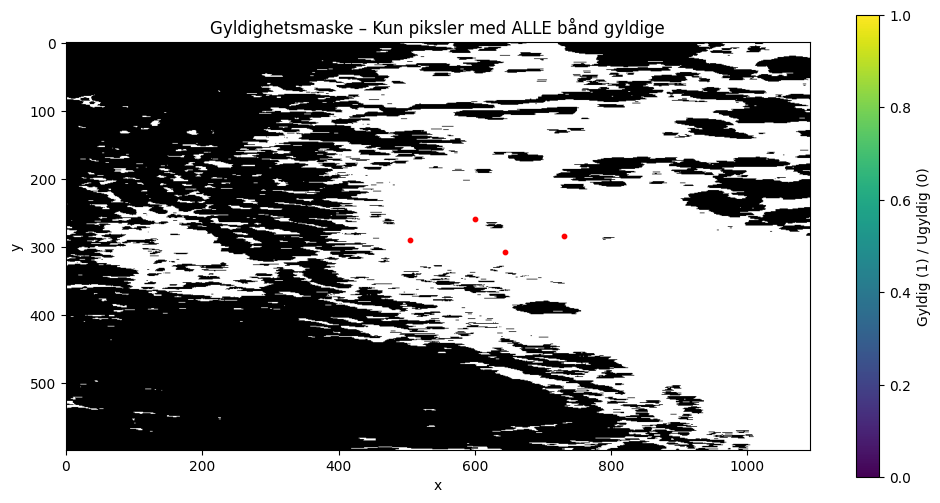

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Anta at `data` har formen (114, 598, 1092)
# Lag maske: True der INGEN bånd er NaN (dvs. alle 114 bånd er gyldige)
valid_mask_all = ~np.isnan(rss_atmc_250423_2).any(axis=0)  # shape: (598, 1092)

# Visualiser masken
plt.figure(figsize=(12, 6))
plt.imshow(valid_mask_all, cmap='gray')
plt.title("Gyldighetsmaske – Kun piksler med ALLE bånd gyldige")
plt.xlabel("x")
plt.ylabel("y")
#plt.scatter(458, 292, color='red', s=10)
for i in range(4):
    plt.scatter(start_end_row_col_2[i], start_end_row_piksel_2[i] , color='red', s=10)
plt.colorbar(label='Gyldig (1) / Ugyldig (0)')
plt.show()

In [ ]:
# Get the flag value at a specific pixel
flag_val = cla_atm_250423['flags'].values[292, 632]

# Get the list of flag names and masks
flag_names = cla_atm_250423['flags'].attrs['flag_meanings'].split()
flag_masks = cla_atm_250423['flags'].attrs['flag_masks']

# Find which flags are active
active_flags = [name for name, mask in zip(flag_names, flag_masks) if flag_val & mask]

print(f"Flags active at (458, 292): {active_flags}")  ## veldig nice mapper jo ut alt av skyer og land :)))

Flags active at (458, 292): ['INCONSISTENCY']


In [ ]:
#print(cla_atm_250423_2['flags'])
print(cla_atm_250423_2['flags'].attrs['flag_meanings'])

LAND CLOUD_BASE L1_INVALID NEGATIVE_BB OUT_OF_BOUNDS EXCEPTION THICK_AEROSOL HIGH_AIR_MASS EXTERNAL_MASK CASE2 INCONSISTENCY ANOMALY_RWMOD_BLUE


### Plotting

ValueError: x and y must have same first dimension, but have shapes (110,) and (109,)

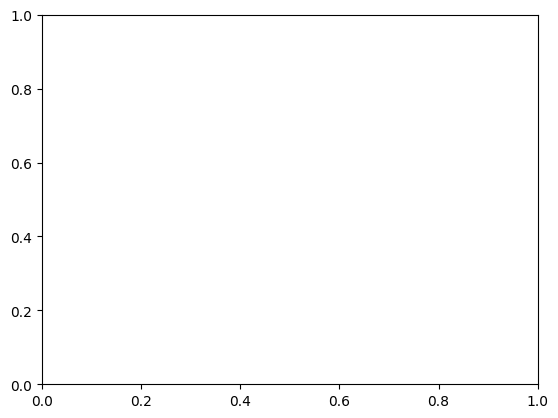

In [ ]:
#plt.plot(x, median_2, color='black', label='median 250423_2')
#plt.plot(x, median, color='red', label='median 250423')

#plt.plot(x, normaized_spectrum_median_250423_2, color='black', label='median 250423_2')
#plt.plot(x, normaized_spectrum_median_250423, color='red', label='median 250423')

plt.plot(x, l2_normalized_median_spectrum_250423_2, color='black', label='median 250423_2')
plt.plot(x, l2_normalized_median_spectrum_250423, color='red', label='median 250423')

plt.xlabel("Wawelength (nm)")
plt.ylabel("Water leaving radience ") #finne enheten her [sr^{-1}]
plt.title("random pixel")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()
